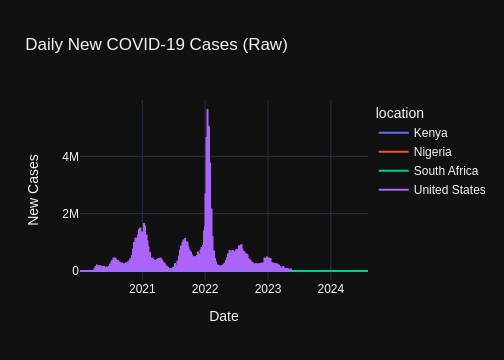

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


data = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv')
df = pd.DataFrame(data)
# df.columns
# df.head()

# Convert 'date' to datetime
df['date'] = pd.to_datetime(df['date'])

# Specify critical (key) columns
key_column = df[['continent', 'date', 'location', 'total_cases', 'total_deaths', 'new_cases', 'new_deaths', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated', 'total_boosters', 'population', 'population_density', 'median_age', 'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'life_expectancy', 'human_development_index']]

# Specify countries of interest
countries = [ 'Nigeria', 'Kenya', 'South Africa', 'United States']
filtered_df = key_column[key_column['location'].isin(countries)]
# print(filtered_df.head())

# Drop missing dates & critical columns
filtered_clean = filtered_df.dropna(subset=key_column)
filtered_clean = filtered_clean.reset_index(drop=True) # Reset index

#  Handling missing numeric values with interpolate()
filtered_clean = filtered_clean.sort_values(['location', 'date'])
filtered_clean['total_cases'] = filtered_clean.groupby('location')['total_cases'].transform(
      lambda x: x.interpolate(method='linear'))


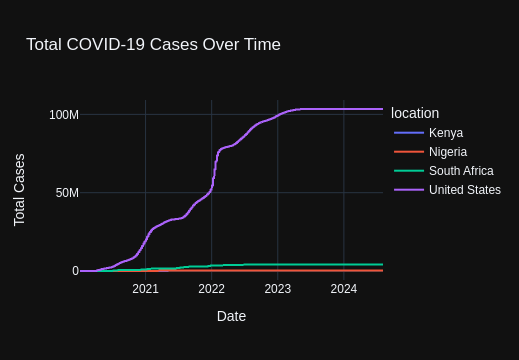

In [41]:
# # An interactive plot of total cases over time for selected countries.
# fig = px.line(
    filtered_df,
    x='date',
    y='total_cases',
    color='location',
    title='Total COVID-19 Cases Over Time',
    labels={'total_cases': 'Total Cases', 'date': 'Date'},
    template='plotly_dark'
)

fig.update_layout(hovermode='x unified')
fig.show()

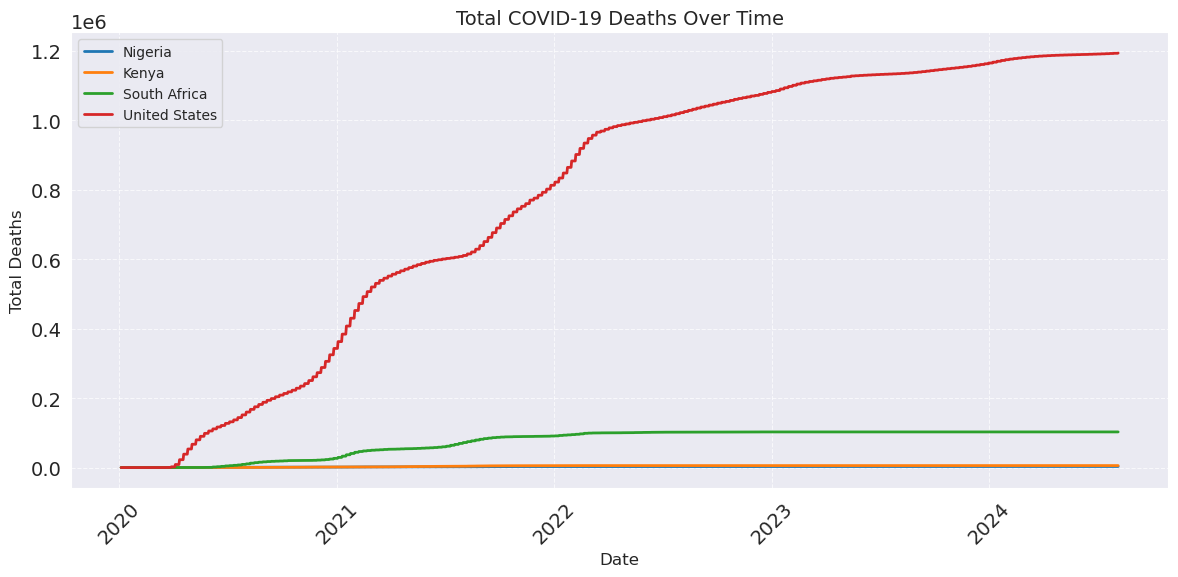

In [42]:
# Ploting a line chart of total deaths over time.
plt.figure(figsize=(12, 6))
for country in countries:
    country_data = filtered_df[filtered_df['location'] == country]
    plt.plot(country_data['date'], country_data['total_deaths'], label=country, linewidth=2)

plt.title('Total COVID-19 Deaths Over Time', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Deaths', fontsize=12)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

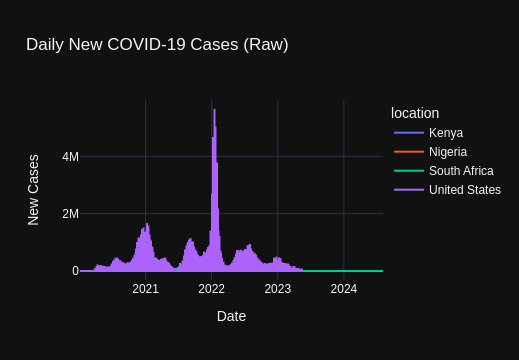

In [44]:
# Comparing daily new COVID-19 cases between countries using an interactive time-series plot.
fig = px.line(
    filtered_df, 
    x='date', 
    y='new_cases', 
    color='location',
    title='Daily New COVID-19 Cases (Raw)',
    labels={'new_cases': 'New Cases', 'date': 'Date'},
    template='plotly_dark'
)
fig.update_layout(hovermode='x unified')
fig.show()

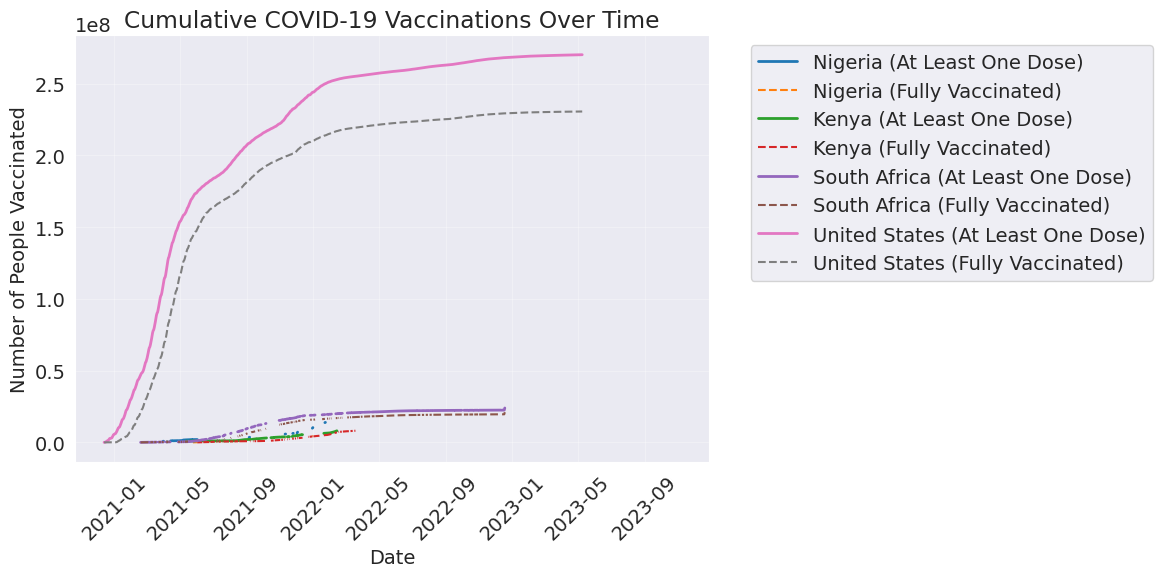

In [45]:
# Ploting the cumulative vaccinations over time for selected countries

plt.figure(figsize=(12, 6))

for country in countries:
    country_df = df[df['location'] == country]
    
    # Plot at least one dose
    plt.plot(country_df['date'], 
            country_df['people_vaccinated'], 
            label=f'{country} (At Least One Dose)',
            linewidth=2)
    
    # Plot fully vaccinated
    plt.plot(country_df['date'], 
            country_df['people_fully_vaccinated'],
            linestyle='--',
            label=f'{country} (Fully Vaccinated)')

plt.title('Cumulative COVID-19 Vaccinations Over Time')
plt.xlabel('Date')
plt.ylabel('Number of People Vaccinated')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


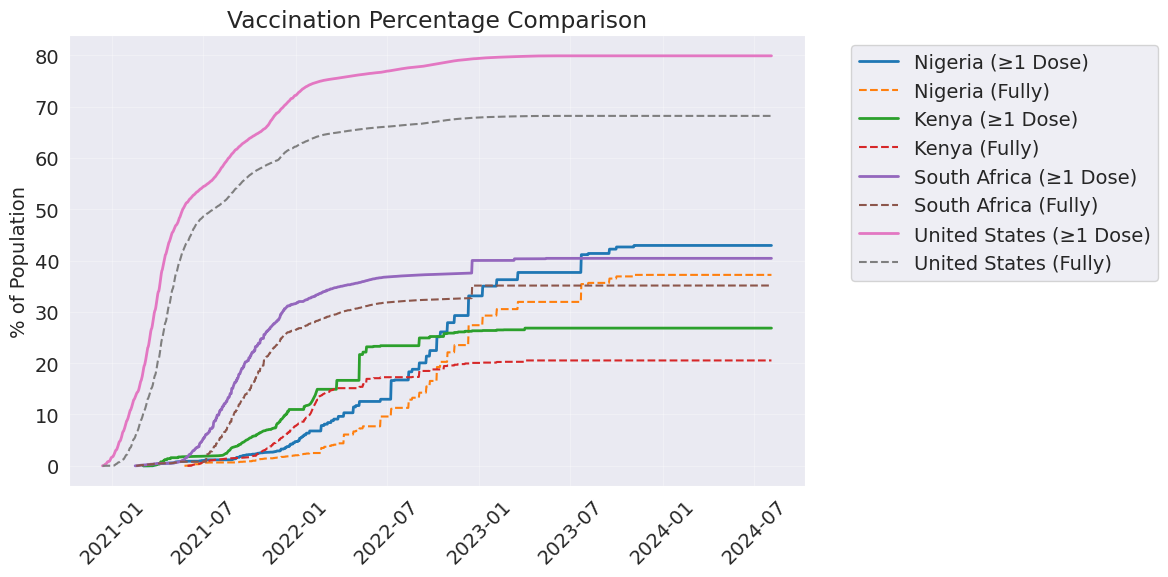

In [51]:
# Comparing the percentage of vaccinated population across countries with clear visualizations.

# Select countries and columns
countries = [ 'Nigeria', 'Kenya', 'South Africa', 'United States']
cols = ['date', 'location', 'people_vaccinated', 'people_fully_vaccinated', 'population']
df = df[df['location'].isin(countries)][cols].dropna(subset=['population'])

# Calculate percentages
df['% ≥1 Dose'] = (df['people_vaccinated'] / df['population']) * 100
df['% Fully Vaccinated'] = (df['people_fully_vaccinated'] / df['population']) * 100

plt.figure(figsize=(12, 6))
for country in countries:
    subset = df[df['location'] == country]
    plt.plot(subset['date'], subset['% ≥1 Dose'], 
            label=f'{country} (≥1 Dose)', lw=2)
    plt.plot(subset['date'], subset['% Fully Vaccinated'], 
            '--', label=f'{country} (Fully)')

plt.title('Vaccination Percentage Comparison')
plt.ylabel('% of Population')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.grid(alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

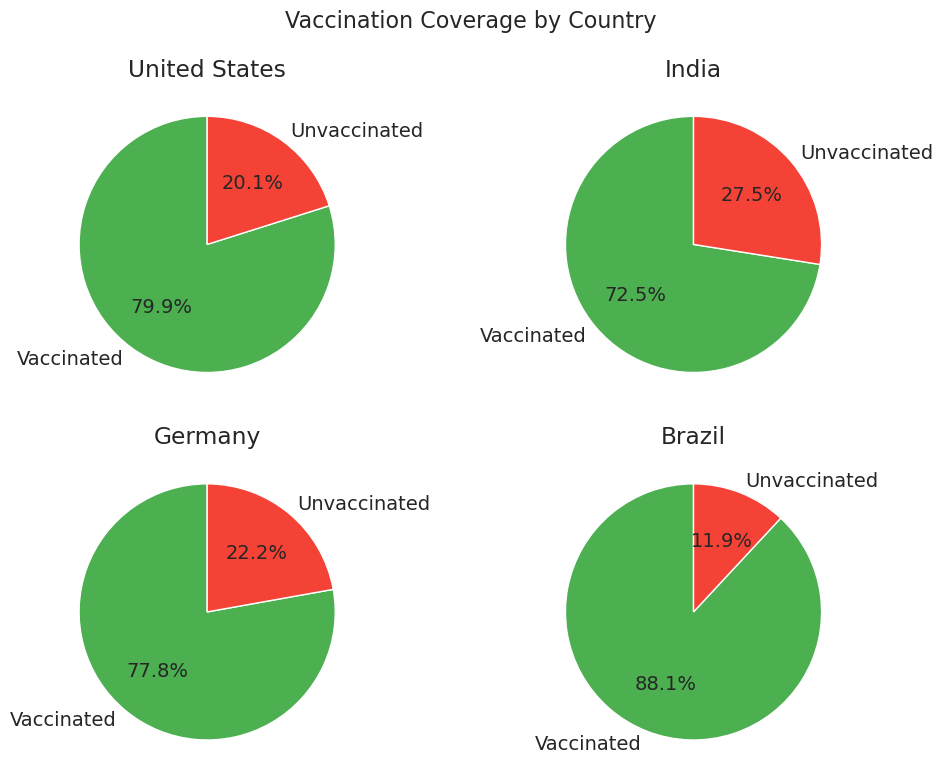

In [56]:
# Ploting pie charts for vaccinated vs. unvaccinated.

# Choose countries
countries = ["United States", "India", "Germany", "Brazil"]
data = latest[latest['location'].isin(countries)][['location', 'people_vaccinated', 'population']]

# Calculate vaccinated vs unvaccinated
data['vaccinated'] = data['people_vaccinated'].fillna(0)
data['unvaccinated'] = data['population'] - data['vaccinated']
data['pct_vaccinated'] = (data['vaccinated'] / data['population']) * 100

plt.figure(figsize=(10, 8))
for i, country in enumerate(countries, 1):
    plt.subplot(2, 2, i)
    sizes = data[data['location'] == country][['vaccinated', 'unvaccinated']].iloc[0]
    plt.pie(sizes, 
            labels=['Vaccinated', 'Unvaccinated'], 
            autopct='%1.1f%%',
            colors=['#4CAF50', '#F44336'],
            startangle=90)
    plt.title(country)
plt.suptitle('Vaccination Coverage by Country', fontsize=16)
plt.tight_layout()
plt.savefig('vaccine_pie.png', dpi=300)
plt.show()

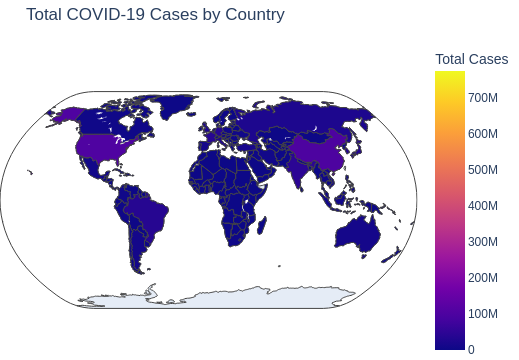

In [59]:
# Building a Choropleth Map to visualize cases or vaccination rates by country on a world map.

# Calculate vaccination rate (%)
latest['vaccination_rate'] = (latest['people_vaccinated'] / latest['population']) * 100

# Handle missing ISO codes (if any)
latest = latest.dropna(subset=['iso_code'])

fig = px.choropleth(
    latest,
    locations="iso_code",  # ISO-3 country codes
    color="total_cases",   # Metric to visualize
    hover_name="location",
    color_continuous_scale=px.colors.sequential.Plasma,
    title="Total COVID-19 Cases by Country",
    labels={'total_cases': 'Total Cases'},
    projection="natural earth"  # Other options: "equirectangular", "orthographic"
)

fig.update_layout(margin={"r":0,"t":40,"l":0,"b":0})
fig.show()

In [ ]:
# Insights & Reporting

# key insights:
# 1. Vaccination Rollout Speed: Israel and the UAE achieved rapid vaccination coverage (>50% in 3 months), while many African nations like Kenya lagged below 10% for over a year.  

# 2. Fatality Rates: Countries with weaker healthcare systems (e.g., Brazil, India) had higher death-to-case ratios compared to nations like Germany and Japan.  

# 3. Case Counts: The U.S. and India led in total cases due to large populations, but per-capita rates were highest in smaller European countries like Austria and Belgium.  

# 4. Zero-COVID Outcomes: Nations like China and New Zealand initially suppressed cases but later faced sharp omicron waves after reopening.  

# 5. Vaccination Plateaus: Global vaccination rates stalled near 60%, with political divides (e.g., U.S. states) and access gaps leaving 40% unvaccinated.

# Anomalies and Interesting Patterns:

# Anomaly: 
# 1. Some wealthy countries (e.g., USA, Germany) show >70% vaccination rates, while others (e.g., India, Brazil) lag despite large outbreaks.
# 2. Small countries (e.g., Iceland, Malta) had higher per-capita cases/deaths than populous nations.
# 3. Some countries (e.g., Canada, Portugal) hit >85% vaccination but still experienced waves.
# 4. Countries with older populations (e.g., Japan, Italy) had higher death rates early on.

# Pattern:
# 1. Europe’s 2021 wave coincided with low cases in Asia.
# 2. Dense populations and travel hubs were hit harder early.
# 3. Death rates dropped post-2021 due to vaccines/prior immunity (e.g., US deaths fell from 3,000/day in 2021 to 400/day in 2022).
# 4. Strong correlation between GDP per capita and vaccination rates (high-income = faster rollout).